In [2]:
!pip install keras

In [4]:
from keras.datasets.cifar10 import load_data

In [5]:
from matplotlib import pyplot

In [6]:
(trainX, trainy), (testX, testy) = load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


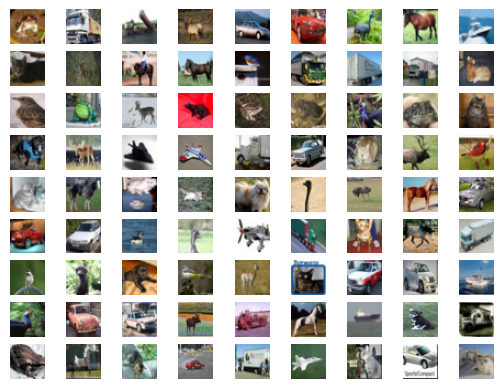

In [8]:
for i in range(81):
  pyplot.subplot(9,9,i+1)
  pyplot.axis("off")
  pyplot.imshow(trainX[i])
pyplot.show()

In [9]:
trainX.shape

(50000, 32, 32, 3)

In [11]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, LeakyReLU
from keras.utils import plot_model

In [14]:
def define_descriminator(in_shape=(32,32,3)):
  model = Sequential()

  model.add(Conv2D(64, (3,3), padding="same", input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256, kernel_size=(3,3), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation="sigmoid"))

  adam = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
  return model

In [15]:
model = define_descriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

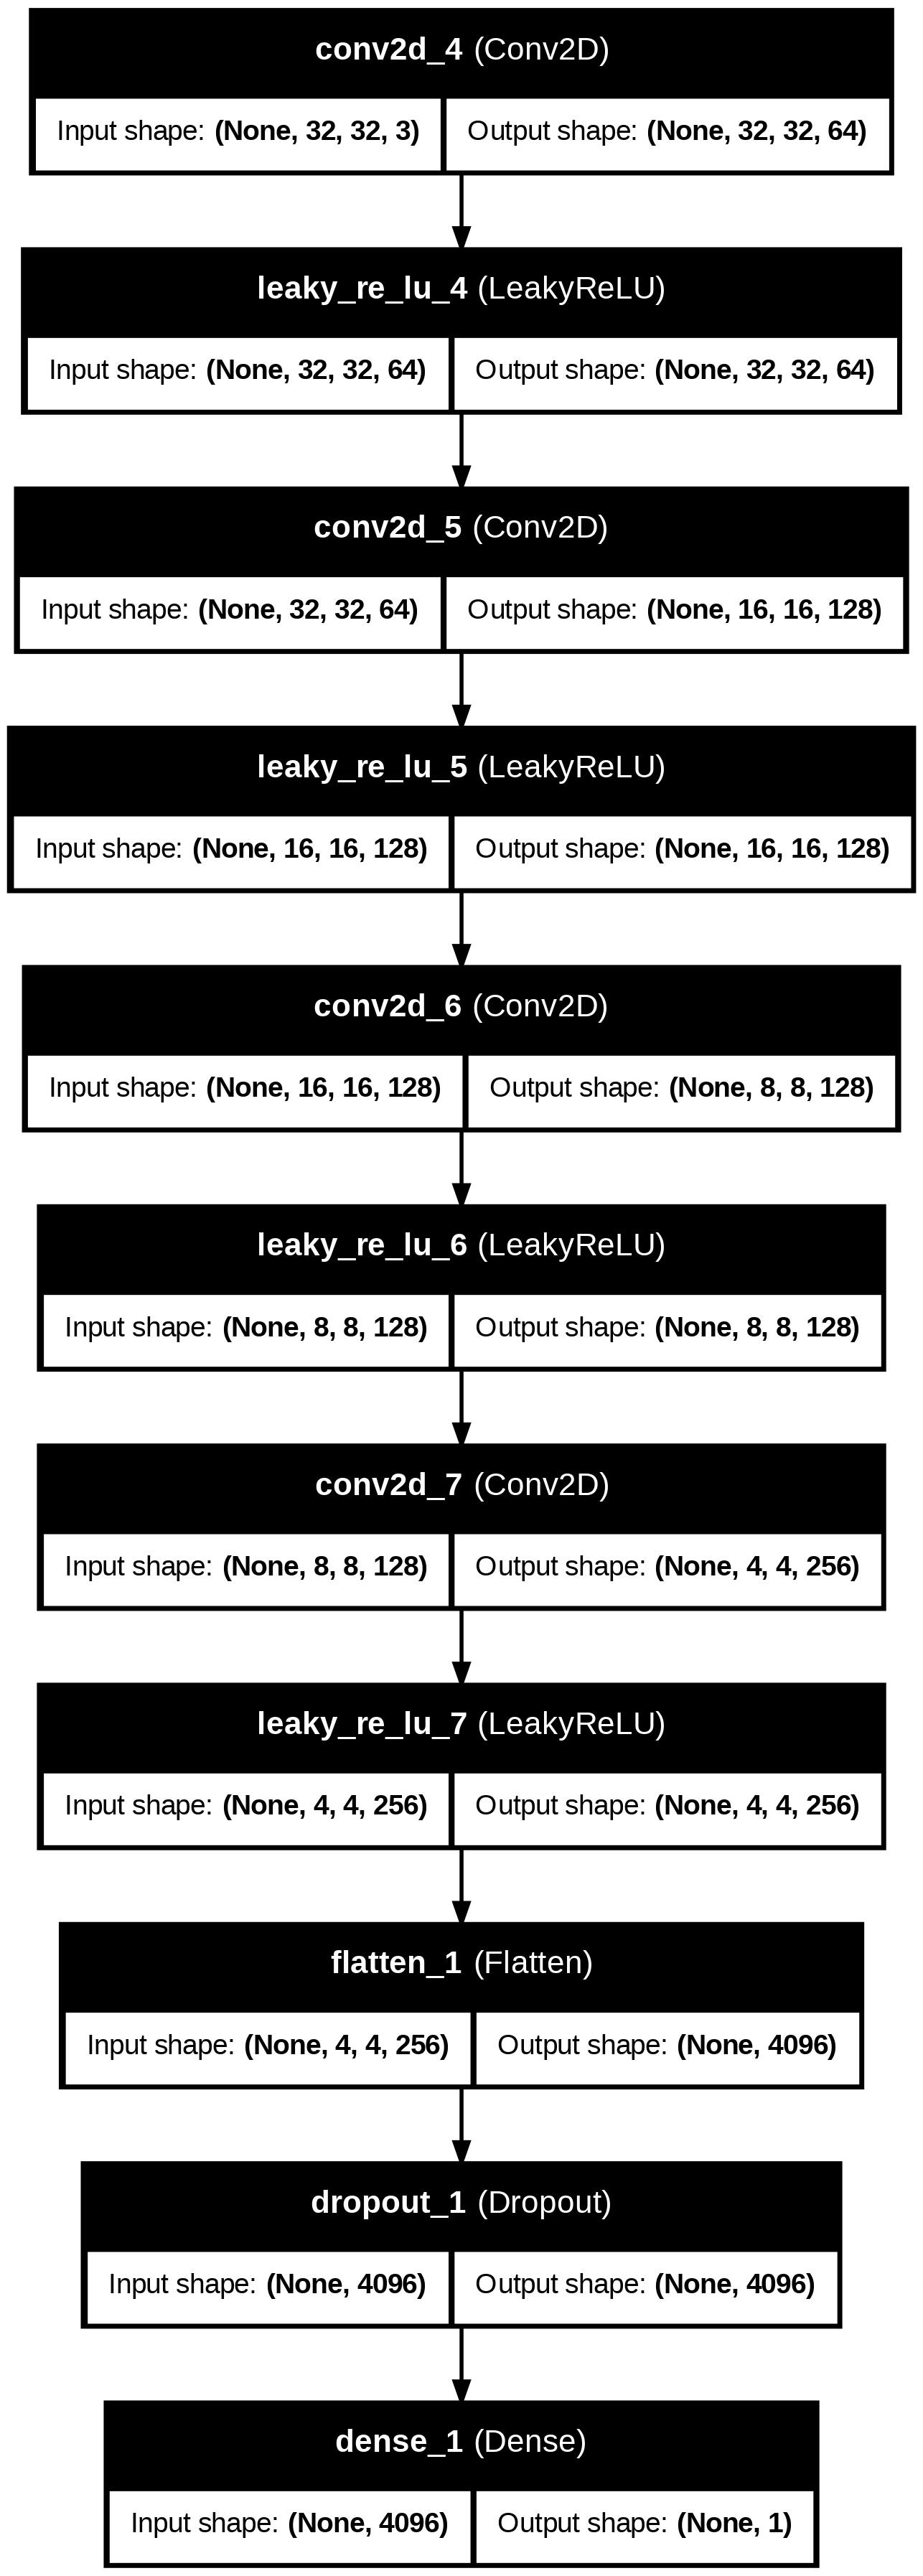

In [17]:
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [18]:
def load_real_samples():
  (trainX,_),(_,_) = load_data()
  X = trainX.astype("float32")
  X = (X - 127.5) / 127.5
  return X

In [19]:
x = load_real_samples()

In [20]:
x.shape

(50000, 32, 32, 3)

In [21]:
x[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [22]:
def generate_real_samples(datasets,n_samples):
  index = np.random.randint(0,datasets.shape[0],n_samples)
  X = datasets[index]
  y = np.ones((n_samples,1))
  return X,y

In [23]:
x,y = generate_real_samples(x,64)

In [24]:
x.shape

(64, 32, 32, 3)

In [25]:
y.shape

(64, 1)

In [26]:
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [27]:
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)

  X = -1 + X*2
  X = X.reshape((n_samples,32,32,3))
  y = np.zeros((n_samples,1))
  return X,y

In [28]:
x,y = generate_fake_samples(64)

In [29]:
print(x.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


In [30]:
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

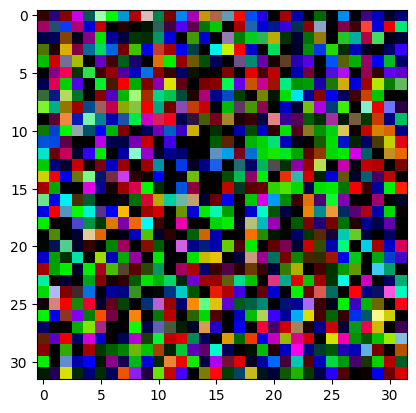

In [31]:
pyplot.imshow(x[0])

In [34]:
def train_descriminator(model, datasets, n_iter=100, n_batch=128):
  half_batch = int(n_batch/2)

  for i in range(n_iter):
    X_real,y_real = generate_real_samples(datasets,half_batch)
    X_fake,y_fake = generate_fake_samples(half_batch)

    _,real_acc=model.train_on_batch(X_real,y_real)
    _,fake_acc=model.train_on_batch(X_fake,y_fake)

    print(">real acc=%.0f%%, fake acc=%.0f%%" % (real_acc*100, fake_acc*100))

In [35]:
model = define_descriminator()
datasets = load_real_samples()
train_descriminator(model, datasets)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


>real acc=20%, fake acc=12%
>real acc=41%, fake acc=34%
>real acc=47%, fake acc=44%
>real acc=51%, fake acc=54%
>real acc=58%, fake acc=62%
>real acc=65%, fake acc=68%
>real acc=70%, fake acc=72%
>real acc=73%, fake acc=75%
>real acc=76%, fake acc=78%
>real acc=78%, fake acc=79%
>real acc=80%, fake acc=81%
>real acc=82%, fake acc=83%
>real acc=83%, fake acc=84%
>real acc=84%, fake acc=85%
>real acc=86%, fake acc=86%
>real acc=86%, fake acc=87%
>real acc=87%, fake acc=88%
>real acc=88%, fake acc=88%
>real acc=89%, fake acc=89%
>real acc=89%, fake acc=89%
>real acc=90%, fake acc=90%
>real acc=90%, fake acc=90%
>real acc=91%, fake acc=91%
>real acc=91%, fake acc=91%
>real acc=91%, fake acc=92%
>real acc=92%, fake acc=92%
>real acc=92%, fake acc=92%
>real acc=92%, fake acc=92%
>real acc=93%, fake acc=93%
>real acc=93%, fake acc=93%
>real acc=93%, fake acc=93%
>real acc=93%, fake acc=93%
>real acc=93%, fake acc=94%
>real acc=94%, fake acc=94%
>real acc=94%, fake acc=94%
>real acc=94%, fake 

In [36]:
from keras.layers import  Reshape,Conv2DTranspose

In [38]:
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 256*4*4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128, kernel_size=(4,4), padding="same", strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, kernel_size=(4,4), padding="same", strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, kernel_size=(4,4), padding="same", strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3, kernel_size=(3,3), padding="same", activation="tanh"))
  return model

In [39]:
latent_dim = 100
model = define_generator(latent_dim)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

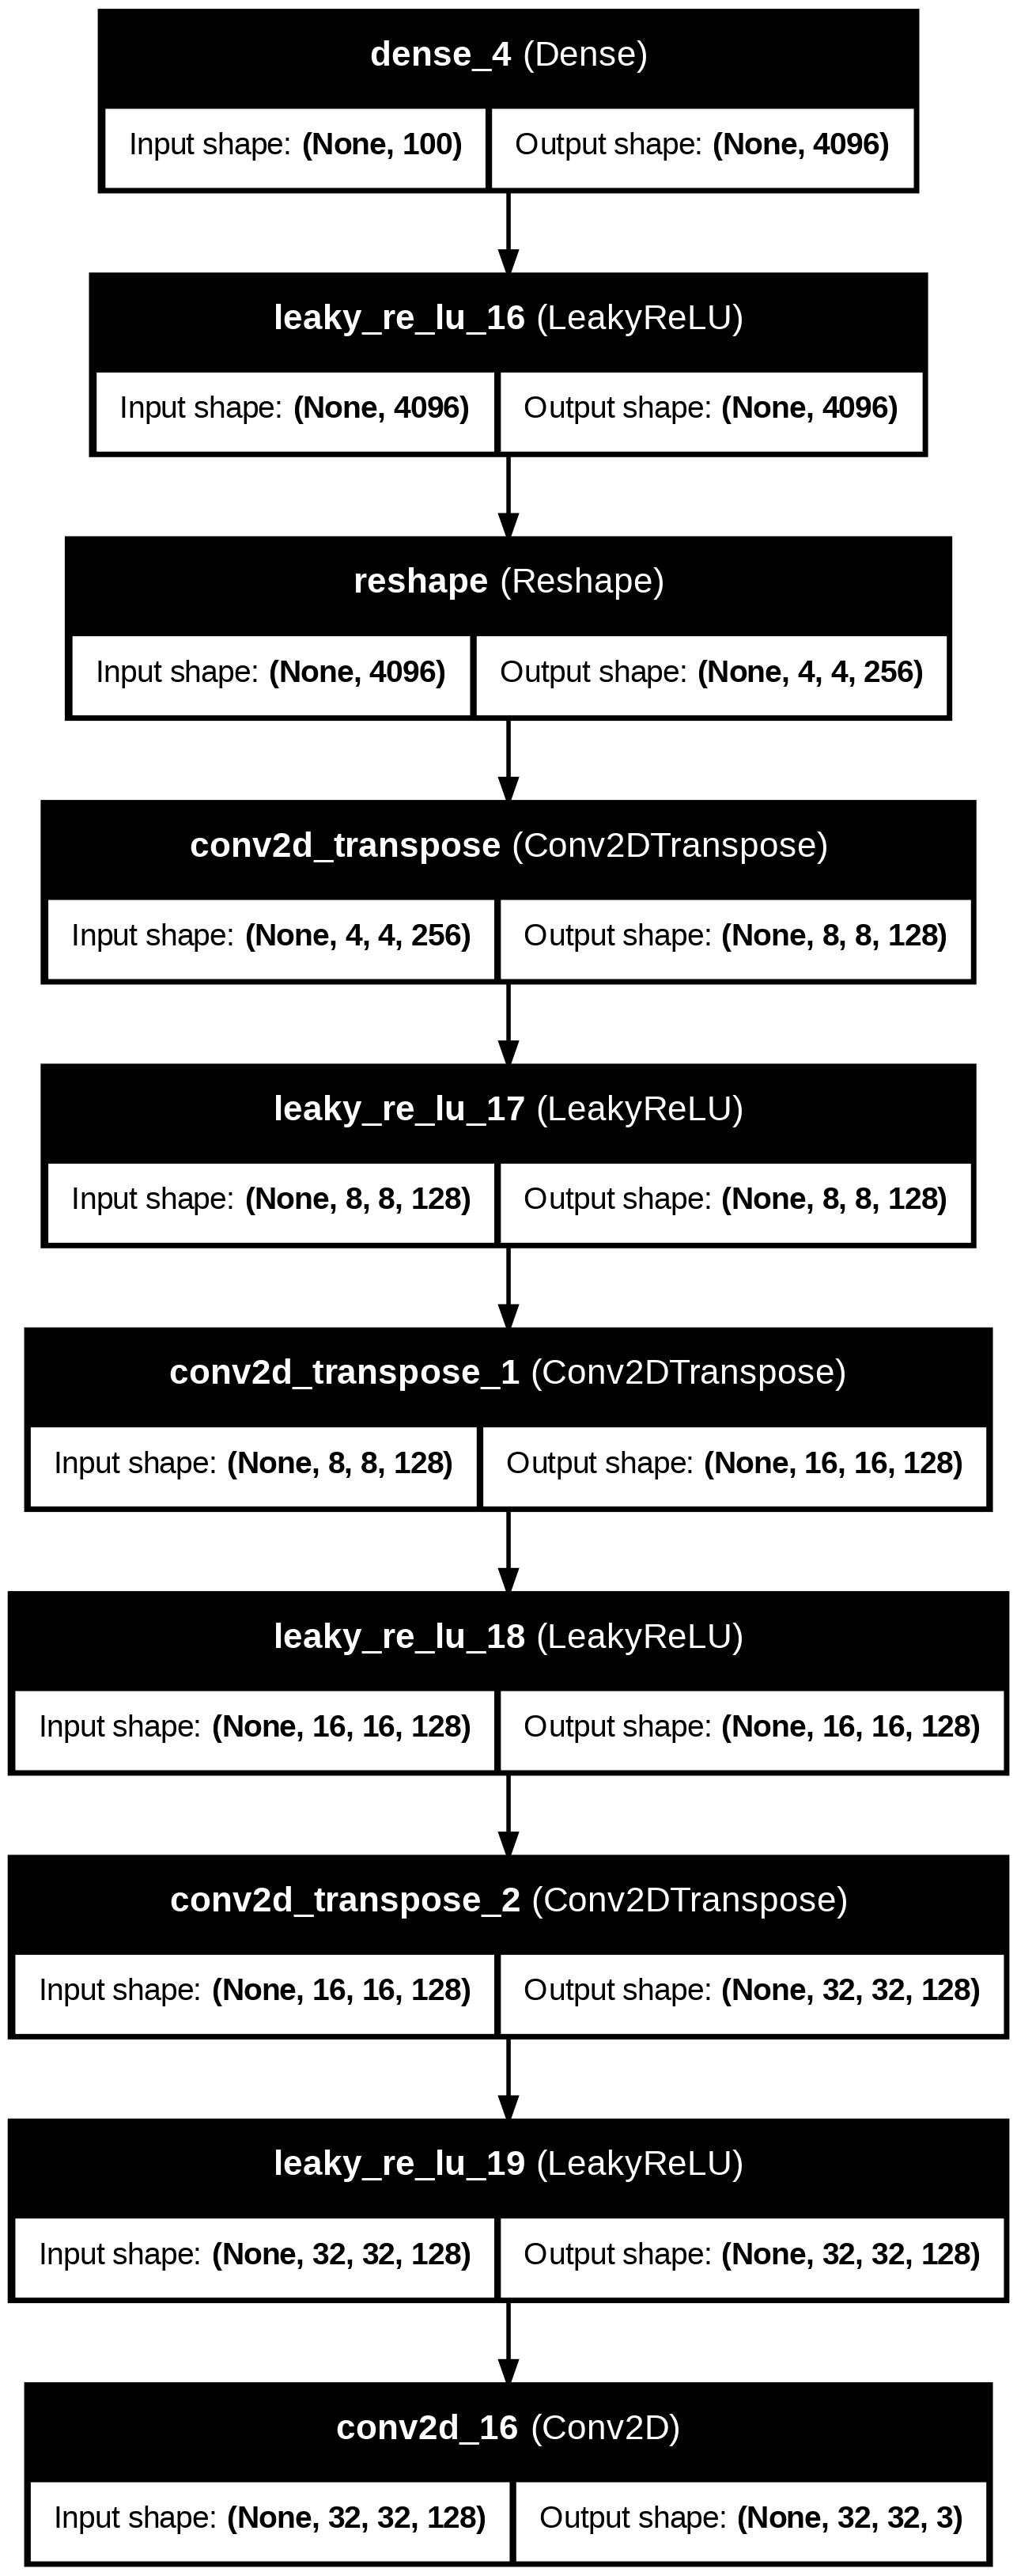

In [41]:
plot_model(model, to_file="generator_model_plot.png", show_shapes=True, show_layer_names=True)

In [42]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim*n_samples)
  x_input = x_input.reshape((n_samples,latent_dim))
  return x_input

In [43]:
data = generate_latent_points(100,64)

In [45]:
data.shape

(64, 100)

In [46]:
def generate_fake_images(generator, latent_dim, n_samples):
  x_input = generate_latent_points(latent_dim, n_samples)
  X = generator.predict(x_input)
  y = np.zeros((n_samples,1))
  return X,y

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


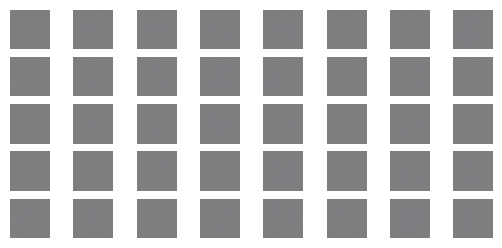

In [48]:
latent_dim = 100
generator = define_generator(latent_dim)
n_samples = 40

X,_ = generate_fake_images(generator, latent_dim, n_samples)
X = (X+1)/2.0

for i in range(n_samples):
  pyplot.subplot(8,8,i+1)
  pyplot.axis("off")
  pyplot.imshow(X[i])
pyplot.show()

In [49]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  adam = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss="binary_crossentropy", optimizer=adam)
  return model

In [50]:
latent_dim=100
d_model = define_descriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
gan_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)            │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

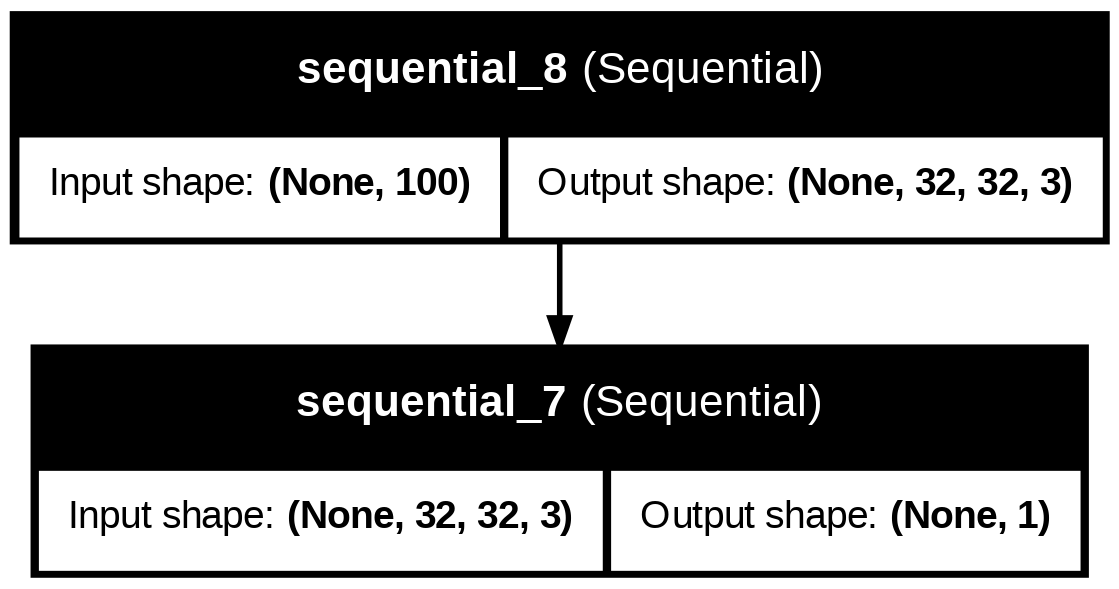

In [52]:
plot_model(gan_model, to_file="gan_model_plot.png", show_shapes=True, show_layer_names=True)

In [65]:
def train(g_model, gan_model, datasets, latent_dim, n_epochs=200, n_batch=128):
  bat_per_epoch = int(datasets.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    for j in range(bat_per_epoch):
      X_real,y_real = generate_real_samples(datasets,half_batch)
      X_fake,y_fake = generate_fake_images(g_model, latent_dim, half_batch)

      d_loss1,_ = d_model.train_on_batch(X_real,y_real)
      d_loss2,_ = d_model.train_on_batch(X_fake,y_fake)
      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch,1))
      g_loss = gan_model.train_on_batch(x_gan,y_gan)
      print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %
            (i+i, j+1, bat_per_epoch, d_loss1, d_loss2, g_loss))

      if((i+1)%10==0):
        summarize_performance(i, g_model, d_model, datasets, latent_dim)

In [67]:
def summarize_performance(epoch, g_model, d_model, datasets, latent_dim, n_samples=150):
  X_real,y_real = generate_real_samples(datasets,n_samples)
  _,acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  X_fake,y_fake = generate_fake_images(g_model, latent_dim, n_samples)
  _,acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

  save_plot(X_fake, epoch)
  filename = "generator_model_%03d.h5" % (epoch+1)
  g_model.save(filename)

In [68]:
def save_plot(examples, epoch, n=7):
  examples = (examples+1)/2.0
  for i in range(n*n):
    pyplot.subplot(n,n,i+1)
    pyplot.axis("off")
    pyplot.imshow(examples[i])

    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

In [ ]:
train(g_model,gan_model,datasets,latent_dim,n_epochs=200,n_batch=100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>0, 1/500, d1=0.679, d2=0.682, g=0.690
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>0, 2/500, d1=0.680, d2=0.682, g=0.689
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>0, 3/500, d1=0.681, d2=0.683, g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
>0, 4/500, d1=0.682, d2=0.684, g=0.685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>0, 5/500, d1=0.683, d2=0.685, g=0.682
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>0, 6/500, d1=0.684, d2=0.688, g=0.678
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>0, 7/500, d1=0.686, d2=0.690, g=0.673
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>0, 8/500, d1=0.690, d2=0.694, g=0.667
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>0, 9/500, d1=0.693, d2=0.698, g=0.661
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>0, 10/500, d1=0.696, d2=0.702, g=0.654
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>0, 11/500, d1=0.700, d2=0.706, g=0.647
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>0, 12/500, d1=0.704, d2=0.710, g=0.640
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>0, 13/500, d1=0.709, d2=0.714, g=0